Test out the code on the 2D model for balanced vehicle motion with just towing force and buoyancy

In [19]:
import numpy as np
import os
import sys

# Get the absolute path of the parent directory of the current file (which is 'test')
# current_dir = os.getcwd()
# model_path = os.path.join(current_dir, '..', 'model')
# sys.path.append(model_path)
sys.path.append('..')

from model.Force import Force, ControlForce, TowingForce
from model.RigidBody import RigidBody


# Similation parameters
N = 150
dt = 0.01

# Rigid body parameters
mass = 0.7  # kg
volume = 0.00075  # m^3
COM = np.array([0., 0.])  # Center of mass [x, z]
center_of_buoyancy = np.array([-0.05, -0.0])  # Center of buoyancy [x, z]
Iyy = 1/12*mass*(3 * 0.1**2 + 0.2**2) # kg*m^2

# Initialize rigid body
rigid_body = RigidBody(mass, volume, Iyy, COM, center_of_buoyancy, N)

# Initial Conditions:
inertial_position = np.array([0, -2, 0]) # [x, y, theta]
initial_inertial_velocity = np.array([2, 0, 0])

# Initialize forces
towing_force_location = np.array([0.05,0.05])
towing_force_inertial_depth = ((towing_force_location - COM) + inertial_position[:-1])[1]
print(f'towing_force_inertial_depth: {towing_force_inertial_depth}')
towing_length = 5 # m
initial_towing_magnitude = 5 # N
D = towing_length * (mass * 9.81 - rigid_body.buoyancy) / (initial_towing_magnitude) - towing_force_inertial_depth
print(f'D: {D}')
towing_force = TowingForce(towing_force_location, N, towing_length, initial_towing_magnitude, D) 
print( (D  - towing_force_inertial_depth) / towing_force.tow_length)
force_direction = towing_force.calculate_direction(D, towing_force_inertial_depth, inertial_position[2])
print(f'force_direction: {np.rad2deg(force_direction)}')

# Add forces to the body
# rigid_body.add_control_force(control_force)
rigid_body.add_tow_force(towing_force)

# Update the center of buoyancy
rigid_body.buoyancy = mass * 9.81 - initial_towing_magnitude * np.sin(force_direction)
x_b = - initial_towing_magnitude * (np.sin(force_direction) * towing_force.location[0] + np.cos(force_direction) * towing_force.location[1] ) / rigid_body.buoyancy
rigid_body.center_of_buoyancy = np.array([x_b, 0])

print('rigid_body.center_of_buoyancy: ', rigid_body.center_of_buoyancy)



# Simulate using the ODE solver
solution = rigid_body.simulate_forward_euler(inertial_position, initial_inertial_velocity, dt)
solution

towing_force_inertial_depth: -1.95
D: 1.4595
0.6819
force_direction: 42.992294749983394
rigid_body.center_of_buoyancy:  [-0.10219417  0.        ]


In [20]:
rigid_body.buoyancy


3.4575000000000005

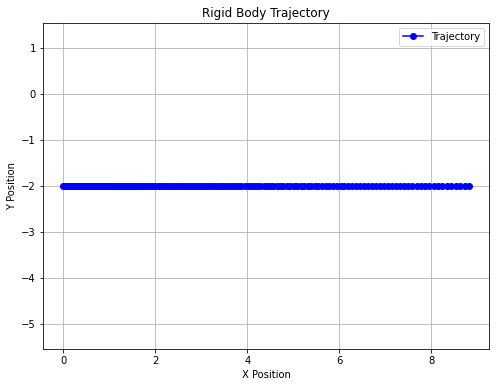

In [21]:
import matplotlib.pyplot as plt
x = rigid_body.position[:, 0]
y = rigid_body.position[:, 1]

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-', color='b', label='Trajectory')
plt.title('Rigid Body Trajectory')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid()
plt.legend()
plt.axis('equal')  # Equal aspect ratio for x and y axes

plt.show()

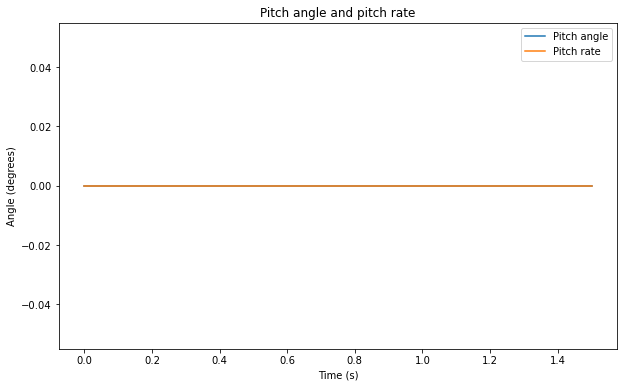

In [31]:
time = np.linspace(0, dt * N, N)
pitch_angle = np.rad2deg(rigid_body.pitch_angle)
pitch_rate = np.rad2deg(rigid_body.pitch_rate)

plt.figure(figsize = (10, 6))
plt.plot(time, pitch_angle, label = 'Pitch angle')
plt.plot(time, pitch_rate, label = 'Pitch rate')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Pitch angle and pitch rate')
plt.legend()

plt.show()

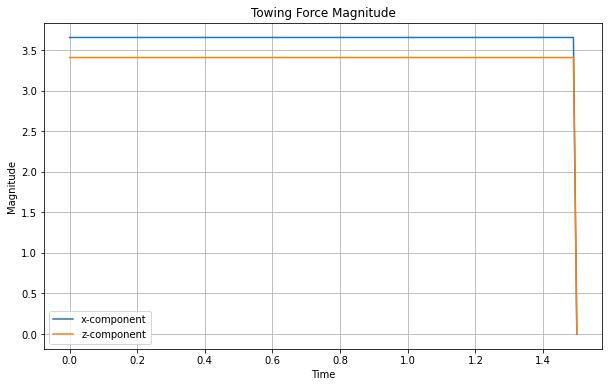

In [27]:
towing_magnitude  = towing_force.magnitude
plt.figure(figsize=(10, 6))
plt.plot(time, towing_magnitude[:, 0], label='x-component')
plt.plot(time, towing_magnitude[:, 1], label='z-component')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Towing Force Magnitude')
plt.legend()
plt.grid(True)
plt.show()

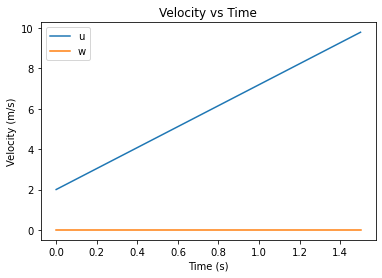

In [28]:
v = rigid_body.velocity
plt.plot(time, v[:,0])
plt.plot(time, v[:,1])
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time')
plt.legend(['u', 'w'])
plt.show()
plt.show()